## Matrices Operations and Linear Regression

Suggestion: explore the NumPy library documentation to find the right functions to solve the exercises below

NumPy docs: https://numpy.org/doc/stable/

## Setup

In [1]:
import numpy as np  # This should be all the dependencies you will need


### 1.1 Matrix Element Wise-multiplication

Consider the two following matrices 

$$
A = \begin{pmatrix}
1&0&0\\
0&1&0\\
0&0&1\\
\end{pmatrix}
$$

and

$$
B = \begin{pmatrix}
1&2&3\\
4&5&6\\
7&8&9\\
\end{pmatrix}
$$

Write a Python program that computes the element-wise multiplication of the two matrices, i.e.

$$
C = \begin{pmatrix}
1&0&0\\
0&5&0\\
0&0&9\\
\end{pmatrix}
$$

In [15]:
## write your code here

a = np.array([1, 0, 0, 0, 1, 0, 0, 0, 1]).reshape(3, 3)
a

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [16]:
b = np.arange(1, 10).reshape(3, 3)
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [23]:
c = a*b
print(c)

c_example2= np.multiply(a,b)
c_example2

[[1 0 0]
 [0 5 0]
 [0 0 9]]


array([[1, 0, 0],
       [0, 5, 0],
       [0, 0, 9]])

In [21]:
c = np.dot(a, b)
c

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

when you do np.dot or np.matmul it does matrix multiplication not element-wise multiplication. 

matrix multipliation follows lienar algebra rules fo rows x column but since a is an identity matrix it does nothing when multipled.

a*b or np.multiply(a,b) does element-wise multipliction which multiples each elemnt in the same posititon 

an identity matrix is a special square matrix that acts like 1 in normal multiplication - it has 1s on the main diagonal adn 0s everywhere else --> it is np.eye. It is needed for solving lienar equations, finding matrix inverses, computer graphis (transformations), machine learning

systems need a placeholder for “no change” so everything works uniformly - can turn transformations on/off 

### 1.2 Matrix-Matrix Multiplication

Consider the following two matrices

$$
A = \begin{pmatrix}
2&1&3\\
1&1&2\\
\end{pmatrix}
$$

and

$$
B = \begin{pmatrix}
1&2\\
5&6\\
7&9\\
\end{pmatrix}
$$

Write a Python program that computes the matrix multiplication of the two matrices, i.e.

$$
C = A \times B = \begin{pmatrix}
28&37\\
20&26\\
\end{pmatrix}
$$
Run the same program for the matrices of Exercise 1.1. Which result do you get?

In [34]:
## write your code here
q2_a = np.array([2,1,3,1,1,2]).reshape(2,3)
print(q2_a)
print("")
q2_b =np.array([1,2,5,6,7,9]).reshape(3,2)
print(q2_b)

print("")
q2_c = np.dot(q2_a,q2_b)
print(q2_c)



[[2 1 3]
 [1 1 2]]

[[1 2]
 [5 6]
 [7 9]]

[[28 37]
 [20 26]]


### 1.3 Linear Regression

We generate some fake "height" and "weight" data about babies between 0 and 12 months of age.

We  want to create  linear predictor that predicts the weight from the baby age (in month).

In [35]:
# generate some fake "height" and "weight" data about babies between 0 and 12 months of age
babies = range(10)
months = np.arange(12)
data = [(month + np.random.rand(), np.dot(month, 24.7) + 96 + np.random.normal(loc=0, scale=20))
        for month in months
        for baby in babies]
month_data = [element[0] for element in data]
weight_data = [element[1] for element in data]
# Let's put the month_data into the matrix X together with the biases column vector
X_1 = np.array(month_data)    # here we put month_data into a row vector called X_1
X_0 = np.ones([X_1.shape[0], 1]) # this is the biases column vector
X_1 = X_1[:, np.newaxis]    # here we convert X_1 from a row vector to a column vector
X = np.concatenate((X_0, X_1), axis=1) # here we concatenate the biases vector to the month_data vector

# Let's put the weight_data into the output vector y
y = np.array(weight_data)

In [36]:
X.ndim, y.ndim

(2, 1)

In [37]:
X.shape, y.shape

((120, 2), (120,))

Our features matrix $X$ as a column of biases (all set to 1) and our column of input features (i.e age).

Our labels verctor $y$ is a row vector with our output labels (weights in some unspecified unit)

In [38]:
X

array([[ 1.        ,  0.55820697],
       [ 1.        ,  0.17184831],
       [ 1.        ,  0.15171068],
       [ 1.        ,  0.94379045],
       [ 1.        ,  0.29886334],
       [ 1.        ,  0.22689296],
       [ 1.        ,  0.46262408],
       [ 1.        ,  0.99047039],
       [ 1.        ,  0.36760328],
       [ 1.        ,  0.01416165],
       [ 1.        ,  1.91529303],
       [ 1.        ,  1.60927053],
       [ 1.        ,  1.72558371],
       [ 1.        ,  1.20063754],
       [ 1.        ,  1.23194528],
       [ 1.        ,  1.96750683],
       [ 1.        ,  1.87745083],
       [ 1.        ,  1.53812428],
       [ 1.        ,  1.00008931],
       [ 1.        ,  1.61774747],
       [ 1.        ,  2.20941425],
       [ 1.        ,  2.43913713],
       [ 1.        ,  2.0592674 ],
       [ 1.        ,  2.53723183],
       [ 1.        ,  2.01420612],
       [ 1.        ,  2.64254246],
       [ 1.        ,  2.15222081],
       [ 1.        ,  2.03807696],
       [ 1.        ,

In [39]:
y

array([ 69.81171872,  65.42135263,  65.41024126,  73.31367516,
        93.36673459,  92.74466978, 147.843764  ,  78.61657387,
        76.64576492, 103.95914804, 154.90125228,  97.10472179,
       117.29746488, 101.18907706, 117.50205041, 130.68162367,
       153.30582812, 137.17601927, 112.77309995,  77.98347895,
       137.23869366, 142.06793055, 134.70455536, 146.50629708,
       155.93624492, 163.26539887, 147.38127296, 120.08949895,
       125.49603667, 115.41238961, 178.5729643 , 157.30892211,
       174.29307344, 179.4489692 , 157.77738107, 156.23217708,
       160.68465985, 175.69576909, 175.28329091, 216.79836661,
       216.03325483, 149.91782586, 220.26252812, 247.18020916,
       186.33996318, 192.58592162, 223.40806128, 140.74067062,
       192.67732668, 177.69319849, 228.26566663, 211.40283072,
       230.71140397, 187.69279548, 222.8397711 , 223.53445029,
       201.34988   , 231.98342423, 209.6351623 , 179.18405687,
       281.93660589, 249.02266918, 245.23196532, 242.30

Given: 
- the two-dimensional array (i.e. a matrix) $X$, containing a column with biases (all set to 1) and a column containing the ages of children (expressed in months)
- a one dimensional column array $y$ containing the weights of the same children expressed in kilograms
Write a function to compute the best fit  using the Linear Regression model with Ordinary Least Squares Method:
$$
\beta = (X^T X)^{-1}X^T y
$$
where, given a matrix $A$, $A^T$ is the transpose matrix of A, and $A^{-1}$ is the inverse matrix of $A$.


The $X$ and $y$ arrays have precomputed for you in the cell above

In [46]:
# Hint: check the NumPy documentation to find the functions to compute the transpose and the inverse of a matrix
def ols(X, y):
    XtranspX = np.dot(X.T,X)
    XinverseX = np.linalg.inv(XtranspX)
    XtranspY = np.dot(X.T,y)
    betaq3 = np.dot(XinverseX, XtranspY)
    return betaq3

Once you function has been written, you should be able to run the code below:

In [47]:
# find parameters
params = ols(X,y)
print('intercept: {} | slope: {}'.format(params[0], params[1]))

intercept: 81.68305392355728 | slope: 25.05615058254942


You should also be able to visualize the result of the OLS fitting running the code in the cell below:

Text(0, 0.5, 'Weight (?)')

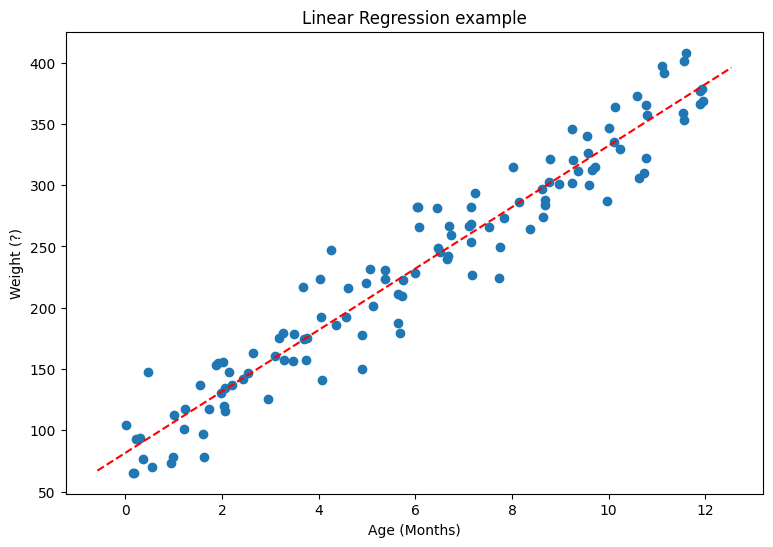

In [48]:
## here we draw a graph of the linear estimator
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 1, figsize=(9, 6))
axes.scatter(month_data, weight_data)
x_vals = np.array(axes.get_xlim())
y_vals = params[0] + params[1] * x_vals
axes.plot(x_vals, y_vals, 'r--')
plt.title('Linear Regression example')
plt.xlabel('Age (Months)')
plt.ylabel('Weight (?)')